In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact, interact_manual
from IPython.display import Image, display, HTML
import matplotlib.ticker as ticker
import mpld3
%matplotlib inline

In [2]:
employee_demo = pd.read_csv('data/quarterly-cleaned.csv')

In [3]:
employee_demo.head()

,Quarter,Pay Grade/Step,Annual Salary,Class #,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
0,2015-04,SR1200,54282.61,7783.0,Info Systems App Analyst 3,Information Technology Service,Full Time,2,Professionals,F,1,White (Not of Hispanic Origin),1974,10/25/2012,Y,DAVIDSON
1,2015-04,SR0401,23113.20,2900.0,Circulation Asst 1,Public Library,Full Time,6,Administrative Support,F,2,Black,1988,12/08/2014,N,DAVIDSON
2,2015-04,MAC08B,37426.69,10236.0,Headstart Teacher 2,Metro Action Commission,Full Time,2,Professionals,F,1,White (Not of Hispanic Origin),1986,10/29/2012,N,WILLIAMSON
3,2015-04,NS,35148.00,NaN,.,Circuit Court Satellite,Full Time,6,Administrative Support,F,2,Black,1956,11/01/2012,N,DAVIDSON
4,2015-04,NS,63125.00,10661.0,Special Proj Asst-Mayor's Off,Administrative,Full Time,2,Professionals,M,1,White (Not of Hispanic Origin),1987,10/29/2012,N,DAVIDSON


C:\Users\Jerry_Iggy\Anaconda3\envs\py37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jerry_Iggy\Anaconda3\envs\py37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


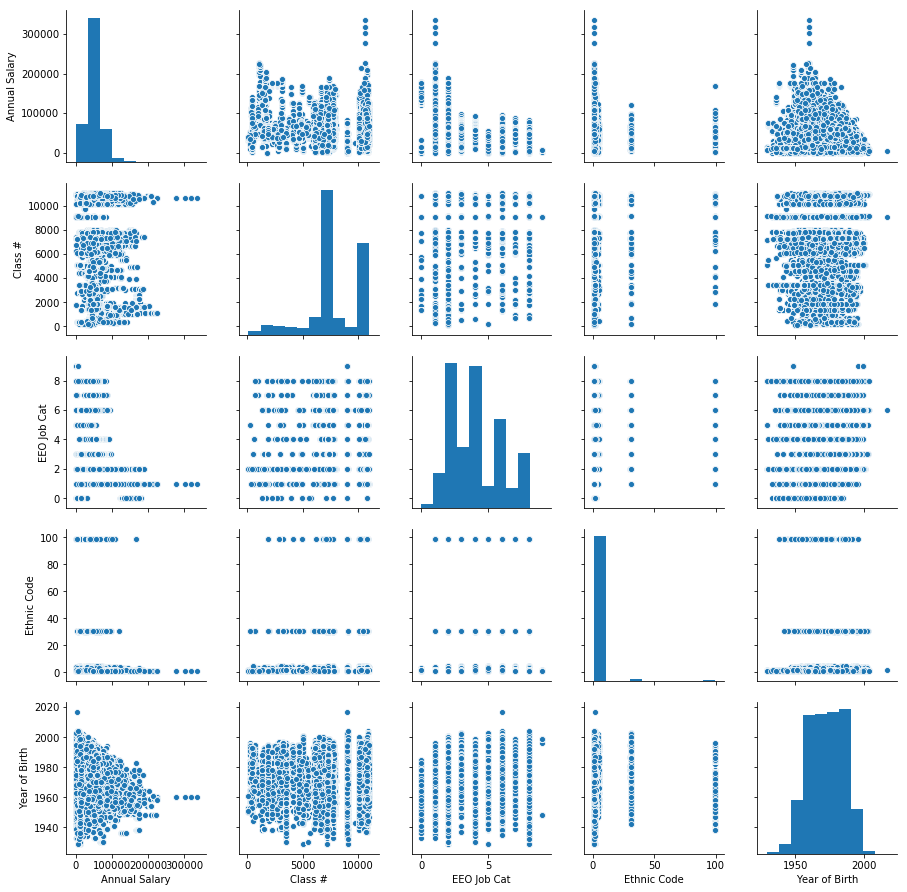

In [4]:
sns.pairplot(employee_demo)

In [5]:
title_count = employee_demo['Title'].value_counts()

In [6]:
race_count = employee_demo['Ethnic Code Description'].value_counts()

In [7]:
race_count

White (Not of Hispanic Origin)    101002
Black                              40382
Hispanic                            3257
Two or More Races                   1659
Unknown                              811
Asian or Pacific Islander            735
Asian                                587
American Indian/Alaskan Native       281
Hawaiian or Pacific Islander          29
Name: Ethnic Code Description, dtype: int64

In [8]:
lower_income_range = employee_demo.where(employee_demo['Annual Salary']<33000).dropna()

In [9]:
middle_income_range = employee_demo.where((employee_demo['Annual Salary']>33000) & (employee_demo['Annual Salary']<66000)).dropna()

In [10]:
upper_income_range = employee_demo.where(employee_demo['Annual Salary']>66000).dropna()

In [11]:
lower_income_range.head()

,Quarter,Pay Grade/Step,Annual Salary,Class #,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
1,2015-04,SR0401,23113.20,2900.0,Circulation Asst 1,Public Library,Full Time,6.0,Administrative Support,F,2.0,Black,1988.0,12/08/2014,N,DAVIDSON
9,2015-04,SR0509,32863.19,10755.0,Call Center Operator-DCSO,Sheriff,Full Time,6.0,Administrative Support,F,1.0,White (Not of Hispanic Origin),1989.0,11/01/2012,N,DAVIDSON
28,2015-04,SR0600,30595.14,10544.0,Animal Care & Control Off 1,Health,Full Time,8.0,Service Maintenance,F,1.0,White (Not of Hispanic Origin),1992.0,11/01/2012,N,DAVIDSON
29,2015-04,SR0600,30595.14,10544.0,Animal Care & Control Off 1,Health,Full Time,8.0,Service Maintenance,F,1.0,White (Not of Hispanic Origin),1988.0,11/01/2012,N,DAVIDSON
30,2015-04,NS,12570.85,9020.0,Seasonal/Part-time/Temporary,Health,Part Time,5.0,Para-Professional,F,1.0,White (Not of Hispanic Origin),1993.0,11/05/2012,N,RUTHERFORD


In [12]:
middle_income_range.head()

,Quarter,Pay Grade/Step,Annual Salary,Class #,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
0,2015-04,SR1200,54282.61,7783.0,Info Systems App Analyst 3,Information Technology Service,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1974.0,10/25/2012,Y,DAVIDSON
2,2015-04,MAC08B,37426.69,10236.0,Headstart Teacher 2,Metro Action Commission,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1986.0,10/29/2012,N,WILLIAMSON
4,2015-04,NS,63125.00,10661.0,Special Proj Asst-Mayor's Off,Administrative,Full Time,2.0,Professionals,M,1.0,White (Not of Hispanic Origin),1987.0,10/29/2012,N,DAVIDSON
5,2015-04,SR1300,63782.78,10108.0,Finance Admin,Finance,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1972.0,10/29/2012,Y,MAURY
6,2015-04,CO0103,34514.67,6982.0,Correctional Officer 1,Sheriff,Full Time,4.0,Protective Service Workers,M,1.0,White (Not of Hispanic Origin),1989.0,11/01/2012,N,RUTHERFORD


In [13]:
upper_income_range.head()

,Quarter,Pay Grade/Step,Annual Salary,Class #,Title,Current Dept Description,Employment Status,EEO Job Cat,EEO Job Cat Desc,Gender,Ethnic Code,Ethnic Code Description,Year of Birth,Date Started,FLSA Exempt Y/N,County
43,2015-04,CA0800,67932.80,10630.0,Engineering Mgr-Convention Ctr,Convention Center Authority,Full Time,2.0,Professionals,M,1.0,White (Not of Hispanic Origin),1957.0,11/26/2012,Y,MONTGOMERY
52,2015-04,SR1300,74226.95,7242.0,Admin Svcs Mgr,Public Defender,Full Time,1.0,Officials and Administrators,F,1.0,White (Not of Hispanic Origin),1960.0,12/17/2012,Y,DAVIDSON
59,2015-04,HD1100,135934.89,7424.0,Medical Doctor,Health,Full Time,2.0,Professionals,F,2.0,Black,1975.0,12/17/2012,Y,DAVIDSON
133,2015-04,SR1400,76599.44,6531.0,Human Resources Mgr,Information Technology Service,Full Time,1.0,Officials and Administrators,F,1.0,White (Not of Hispanic Origin),1961.0,12/26/2012,Y,WILSON
170,2015-04,NS,87137.75,4972.0,Special Asst,Mayor's Office,Full Time,2.0,Professionals,F,1.0,White (Not of Hispanic Origin),1978.0,01/07/2013,Y,DAVIDSON


In [14]:
lower_income_race_count = lower_income_range['Ethnic Code Description'].value_counts()

In [15]:
middle_income_race_count = middle_income_range['Ethnic Code Description'].value_counts()

In [16]:
upper_income_race_count = upper_income_range['Ethnic Code Description'].value_counts()

In [17]:
lower_income_race_count

White (Not of Hispanic Origin)    7704
Black                             6801
Hispanic                           353
Two or More Races                  140
Unknown                            127
Asian                               90
Asian or Pacific Islander           66
American Indian/Alaskan Native      23
Hawaiian or Pacific Islander         4
Name: Ethnic Code Description, dtype: int64

In [18]:
middle_income_race_count

White (Not of Hispanic Origin)    43689
Black                             18004
Hispanic                           1721
Two or More Races                  1132
Asian                               358
Unknown                             353
Asian or Pacific Islander           207
American Indian/Alaskan Native      146
Hawaiian or Pacific Islander         21
Name: Ethnic Code Description, dtype: int64

In [19]:
upper_income_race_count

White (Not of Hispanic Origin)    17710
Black                              3269
Two or More Races                   357
Hispanic                            220
Asian                               139
Asian or Pacific Islander            60
Unknown                              54
American Indian/Alaskan Native       44
Hawaiian or Pacific Islander          3
Name: Ethnic Code Description, dtype: int64

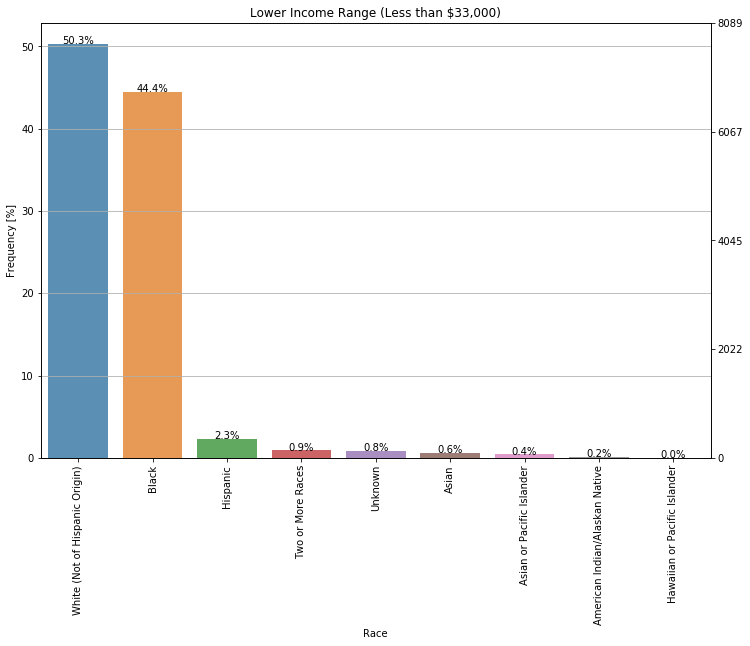

In [42]:
ncount = len(lower_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(lower_income_race_count.index, lower_income_race_count.values, alpha=0.8)
plt.title('Lower Income Range (Less than $33,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
#ax.set_ylim(0,lower_income_race_count.values.max())

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

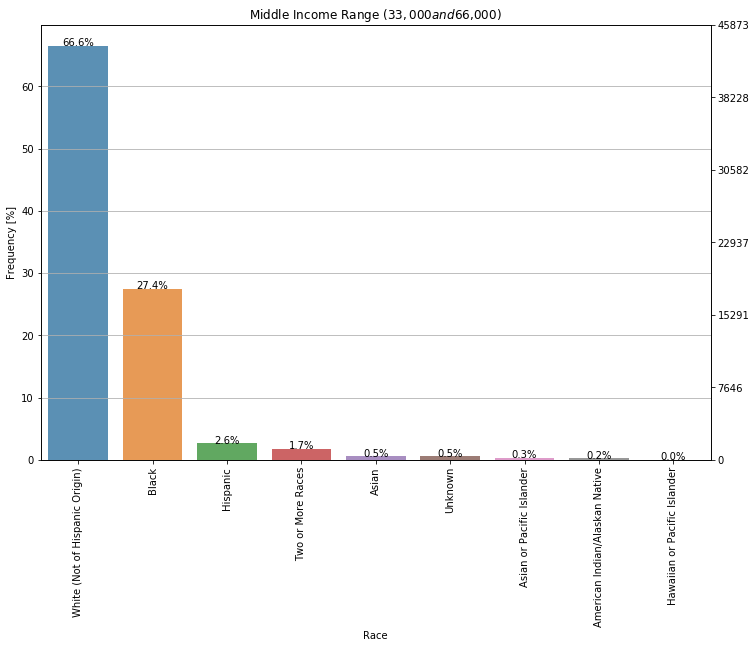

In [41]:
ncount = len(middle_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(middle_income_race_count.index, middle_income_race_count.values, alpha=0.8)
plt.title('Middle Income Range ($33,000 and $66,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text


# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
#ax.set_ylim(0,middle_income_race_count.values.max())

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

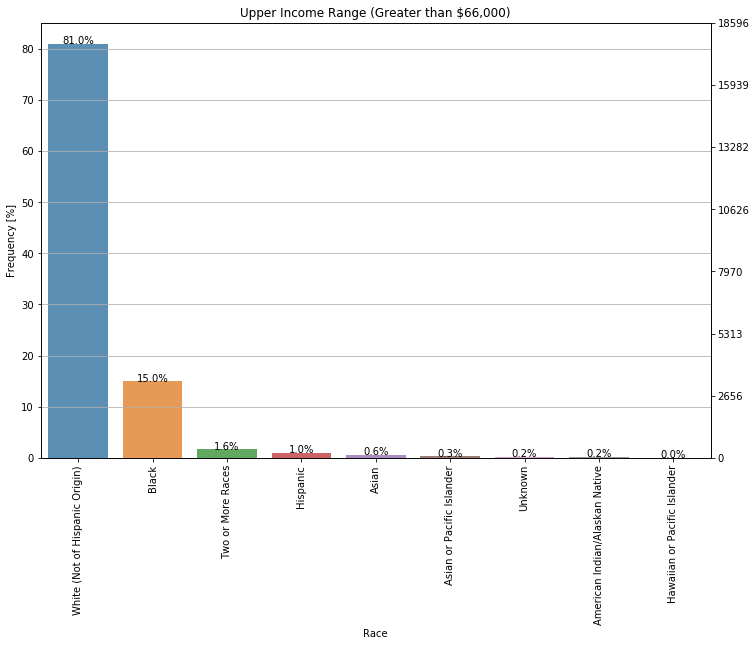

In [43]:
ncount = len(upper_income_range)

plt.figure(figsize=(12,8))
ax = sns.barplot(upper_income_race_count.index, upper_income_race_count.values, alpha=0.8)
plt.title('Upper Income Range (Greater than $66,000)')
plt.xlabel('Race')
plt.xticks(rotation='vertical')
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*(y/ncount)), (x.mean(), y), 
            ha='center', va='baseline') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(8))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)
#ax.set_ylim(0,upper_income_race_count.values.max())

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [23]:
title_count.head(50)

Police Officer 2                  15441
Fire Fighter 2                     5289
Police Sergeant                    3792
Fire Engineer                      2786
Fire Captain                       2773
Paramedic 2                        2465
Correctional Officer 1             2435
Correctional Officer 2             2363
Seasonal/Part-time/Temporary       2358
School Crossing Guard              2314
Office Support Rep 3               2169
Emerg Medical Tech 2               1787
Recreation Leader                  1556
Maintenance & Repair Worker        1525
Public Health Nurse 1              1520
Teacher Asst                       1382
Satellite position                 1377
Office Support Spec 2              1335
Admin Svcs Officer 3               1293
Headstart Teacher 2                1138
Admin Asst                         1137
Admin Svcs Officer 4               1135
Equipment Operator Senior          1118
Emer Telecommunications Off 4      1074
Police Officer 2-Fld Trng Ofcr     1053


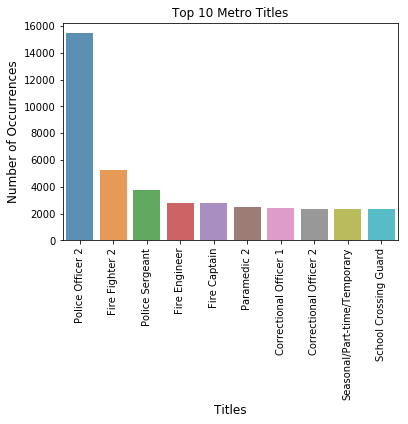

In [24]:
#The top 10 titles
top_title_count = title_count[:10,]
sns.barplot(top_title_count.index, top_title_count.values, alpha=0.8)
plt.title('Top 10 Metro Titles')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Titles', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, 'density')

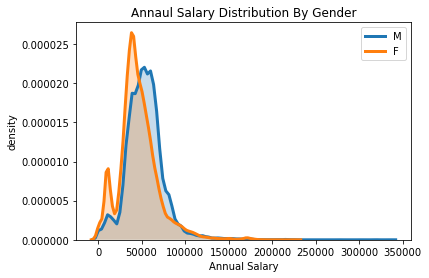

In [68]:
subset_M = employee_demo[employee_demo['Gender'] == 'M']
subset_F = employee_demo[employee_demo['Gender'] == 'F']

sns.distplot(subset_M[['Annual Salary']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'M')

sns.distplot(subset_F[['Annual Salary']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'F')

plt.title('Annaul Salary Distribution By Gender')
plt.xlabel('Annual Salary')
plt.ylabel('density')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

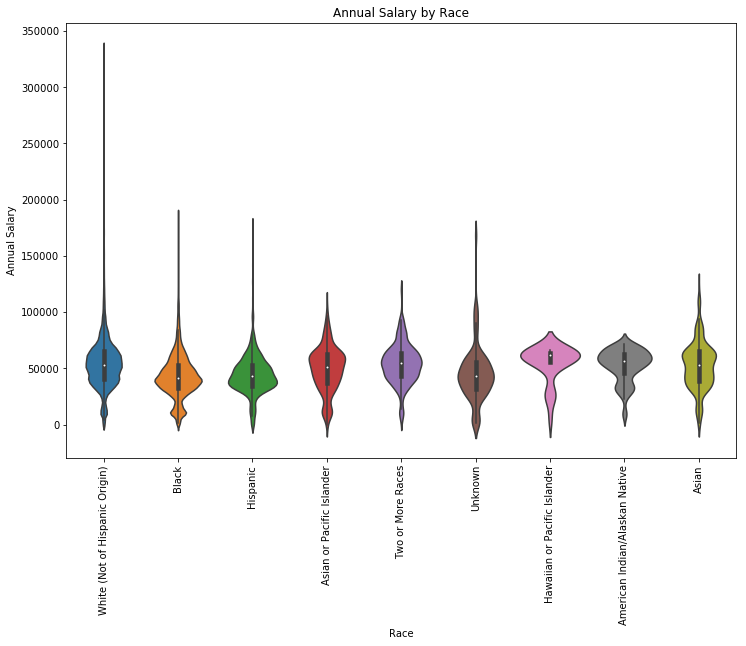

In [83]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'Ethnic Code Description', y  = 'Annual Salary', data = employee_demo)
plt.title("Annual Salary by Race")
plt.suptitle('')
plt.xlabel('Race')
plt.ylabel('Annual Salary')
plt.xticks(rotation='vertical')

In [99]:
employee_demo[['EEO Job Cat Desc', 'Annual Salary']].groupby('EEO Job Cat Desc').describe()

Annual Salary                              \
                                     count          mean           std   
EEO Job Cat Desc                                                         
Administrative Support             23214.0  37967.669419  12402.817272   
Elected Officials                    997.0  63782.064413  69473.463723   
Officials and Administrators        9178.0  83536.336128  35535.860733   
Para-Professional                   5680.0  27030.827972  11960.349842   
Professionals                      37517.0  58694.473942  21052.446689   
Protective Service Workers         36876.0  50104.856011  14260.611292   
Service Maintenance                14315.0  33024.758528  12548.503639   
Service Workers                       22.0   4244.521364   2066.326654   
Skilled Craft Workers               5173.0  48563.003093   8395.881076   
Technicians                        15771.0  61153.653272  12955.063005   

                                                                         \
                                  min         25%       50%         75%   
EEO Job Cat Desc                                                          
Administrative Support           0.00  31363.3900  37746.11   45488.845   
Elected Officials                0.00  15000.0000  15000.00  146413.000   
Officials and Administrators     0.00  58495.4475  81964.50  102000.000   
Para-Professional                0.00  16985.7800  30351.70   35846.880   
Professionals                    0.00  44355.3200  57106.96   72752.730   
Protective Service Workers    8214.57  43735.2100  52996.66   59833.050   
Service Maintenance              0.00  29850.7600  34597.87   40063.780   
Service Workers                936.00   2077.2450   5401.00    5593.270   
Skilled Craft Workers          208.00  42799.6100  46935.20   55365.920   
Technicians                   1451.32  52599.1300  64202.65   69474.980   

                                         
                                    max  
EEO Job Cat Desc                         
Administrative Support         95400.00  
Elected Officials             180000.00  
Officials and Administrators  335160.00  
Para-Professional              55314.29  
Professionals                 188190.00  
Protective Service Workers     91450.06  
Service Maintenance            83200.00  
Service Workers                 5593.27  
Skilled Craft Workers          87949.05  
Technicians                    96518.99